<a href="https://colab.research.google.com/github/MustafaBasit521/Customer_Segmentation/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🛒 Customer Segmentation using K-Means & **DBSCAN**

=> This project applies Unsupervised Learning techniques to cluster mall customers into meaningful segments based on their Annual Income and Spending Score.

# **Importing The Libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# **Loading The Data**

In [3]:
#  data loading and creating
df=pd.read_csv("Mall_Customers.csv")

# **Data Cleaning and Preprocessing**

In [4]:
# Data cleaning and preprocessing

# dropping rows with NAN value
df.dropna(inplace=True)

# resetting index
df.reset_index(drop=True, inplace=True)

# ensuring the data is numeric
# filling the NAN data with mean of data
for col in ['Annual Income (k$)', 'Spending Score (1-100)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].mean(), inplace=True)


/tmp/ipython-input-850441547.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


# **Selecting Features**


In [5]:
# Selecting features

X=df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Scaling The **Data**

In [6]:
# scaling the data

scaler= StandardScaler()
X_scaled= scaler.fit_transform(X)

# **Visualizing The Data**

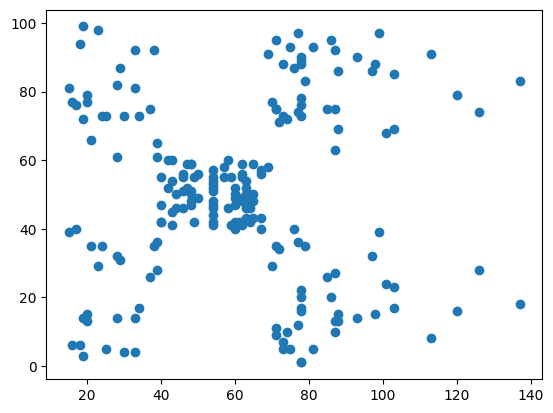

In [7]:
# visualizing the data points before clustering
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.show()


# **Calculating The best K-Value(Elbow-Method)**

Inertias: [399.99999999999994, 269.1425070447921, 157.70400815035939, 108.92131661364358, 65.56840815571681, 55.057348270385965, 44.91271612308711, 37.1817578268213, 32.37724377444034, 29.17899042001402]


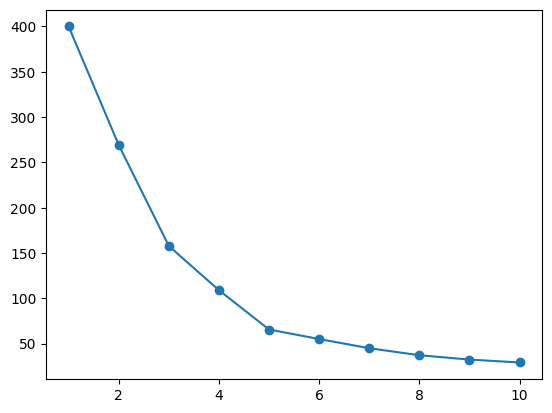

In [8]:
# k means
inertias=[]

for col in range(1,11):
    kmeans= KMeans(n_clusters=col, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
print("Inertias:", inertias)
plt.plot(range(1,11), inertias,marker='o')
plt.show()


# **Cluster Analysis**

=> The best K-value calculated from the graph after visualizing the graph at the point where the linearity diminishes or there is bend in curve , the point is called elbow point and then this value represents the clusters in our model

In [9]:
# clustering
kmeans= KMeans(n_clusters=3)
kmeans.fit_predict(X_scaled)
df['Cluster']= kmeans.fit_predict(X_scaled)
print(df['Cluster'].head())


0    0
1    1
2    0
3    1
4    0
Name: Cluster, dtype: int32


# **Visualizing the Clusters**

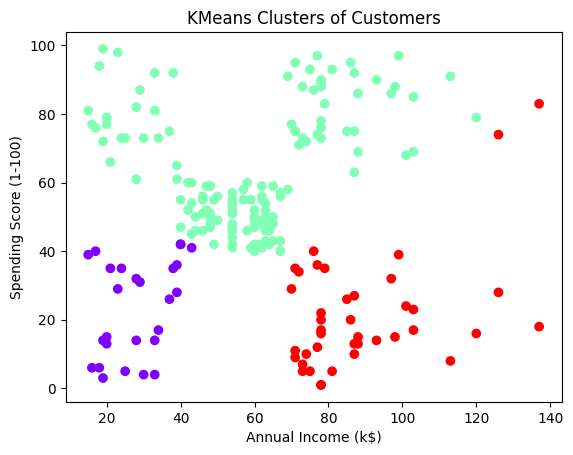

In [10]:
# visualizing

plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='rainbow')
plt.title('KMeans Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

# **Analyzing the Average spending per Each Cluster**

In [11]:
# Average Spending / each Cluster
avgSpending = df.groupby('Cluster')['Spending Score (1-100)'].mean()
print(avgSpending)


Cluster
0    23.307692
1    63.947761
2    21.625000
Name: Spending Score (1-100), dtype: float64


## **=> Visualizing The Spending**


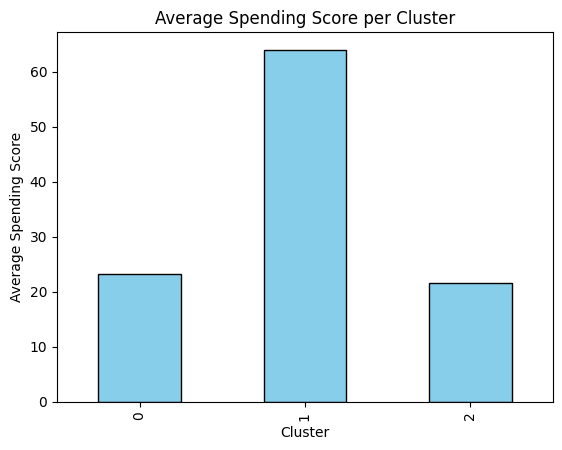

In [12]:

# => Visualizing The Spending

avgSpending.plot(kind='bar',color='skyblue',edgecolor='black' )
plt.xlabel('Cluster')
plt.ylabel('Average Spending Score')
plt.title('Average Spending Score per Cluster')
plt.show()